## 1. Import and utilities

In [1]:
import time
import pickle

import numpy as np
import random

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from utils import *
from q_learning import *
from deep_q_learning import *

In [2]:
# Configurations
save_stats = False
save_figs = False
train = False
load = not train

seed = 0

## 2. Q-Learning

In [3]:
env = TictactoeEnv()

# Hyper-parameters
alpha = 0.05    # Learning rate
gamma = 0.99    # Discount factor
epsilon_opt = 0.5   # Optimal player's epsilon
num_episodes = 20000 # number of episodes
num_avg = 10 # training runs
test_freq = 250 # test frequency
epsilon_min = 0.1 # minimum exploration rate for n^star
epsilon_max = 0.8 # maximum exploration rate for n^star

### 2.1 Learning from experts

#### Question 1: Average reward with $\epsilon = 0.1$

epsilon_exploration_Q1 = 0.1 : 	M_opt =  0.0 	M_rand =  0.838


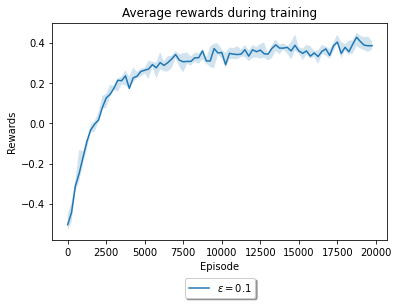

In [4]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Training, we average the results over 10 training runs
epsilon_exploration = 0.1
stats_dict_list = []
if train:
    for i in range(num_avg):
        print('************** RUN', i+1, 'OF', num_avg, '**************')
        stats_dict = {}
        start = time.time()
        Q, stats = q_learning(env, epsilon_exploration=epsilon_exploration, num_episodes=num_episodes, verbose=False, against_opt=True)
        M_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
        M_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
        print("M_opt =", M_opt)
        print("M_rand =", M_rand)
        stats_dict.update({epsilon_exploration: (stats, M_opt, M_rand)})
        stats_dict_list.append(stats_dict)
        print('RUN', i+1, 'took', np.round(time.time()-start,decimals=1), 'seconds')
    # Saving the results
    if save_stats:
        output_folder = os.path.join(os.getcwd(), 'results')
        os.makedirs(output_folder, exist_ok=True)
        fname = output_folder + '/Q1.pkl'
        with open(fname, 'wb') as handle:
            pickle.dump(stats_dict_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load results from dictionary
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    fname = output_folder + '/Q1.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_list = pickle.load(handle)
        
# Plot of the average reward over num_avg training runs with 25th and 75th percentiles'        
plot_stats(stats_dict_list, [epsilon_exploration], 'epsilon_exploration_Q1', '\epsilon', save=save_figs, keys = ['rewards'], perc=True)

#### Questions 2 and 3: Average reward and performance measures for different values of $n^{\star}$ 

In [5]:
test_freq = 250
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [6]:
q_learning_params_list = []
var_name = 'q_learning_n_star_experts'
for n_star in vec_n_star:
    params = {'env': env,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq, 
              'against_opt': True}
    q_learning_params_list.append(params)

In [7]:
np.random.seed(seed)
random.seed(seed)

# Training, performs num_avg complete training runs
if train:
    stats_dict_nstar = train_avg(var_name, vec_n_star, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

# Load results from dictionary
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/Q2_Q3.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_list = pickle.load(handle)

n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.854
n_star = 9146.0 : 	M_opt =  0.0 	M_rand =  0.87
n_star = 19127.0 : 	M_opt =  0.0 	M_rand =  0.844
n_star = 40000 : 	M_opt =  0.0 	M_rand =  0.826


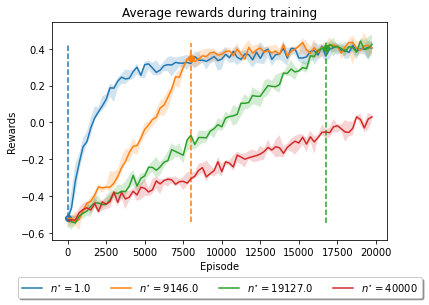

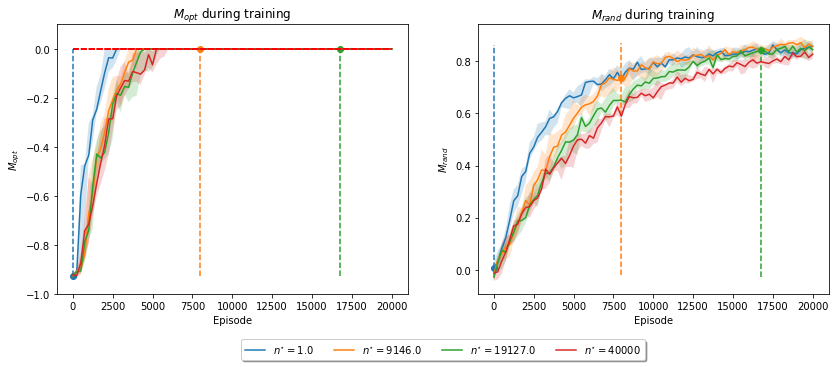

In [8]:
# Show plot presented in the report
plot_n_star = [1., 9146., 19127., 40000]
plot_stats(stats_dict_nstar_list, plot_n_star, 'n_star', "n^{\star}", save=save_figs, decaying_exploration=True, perc=True)

n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.854
n_star = 100.0 : 	M_opt =  0.0 	M_rand =  0.86
n_star = 500.0 : 	M_opt =  0.0 	M_rand =  0.85
n_star = 750.0 : 	M_opt =  0.0 	M_rand =  0.864
n_star = 1000.0 : 	M_opt =  0.0 	M_rand =  0.855
n_star = 1279.0 : 	M_opt =  0.0 	M_rand =  0.836
n_star = 1635.0 : 	M_opt =  0.0 	M_rand =  0.822
n_star = 2091.0 : 	M_opt =  0.0 	M_rand =  0.834
n_star = 2674.0 : 	M_opt =  0.0 	M_rand =  0.872
n_star = 3420.0 : 	M_opt =  0.0 	M_rand =  0.847
n_star = 4373.0 : 	M_opt =  0.0 	M_rand =  0.805
n_star = 5593.0 : 	M_opt =  0.0 	M_rand =  0.853
n_star = 7152.0 : 	M_opt =  0.0 	M_rand =  0.851
n_star = 9146.0 : 	M_opt =  0.0 	M_rand =  0.87
n_star = 11696.0 : 	M_opt =  0.0 	M_rand =  0.856
n_star = 14957.0 : 	M_opt =  0.0 	M_rand =  0.874
n_star = 19127.0 : 	M_opt =  0.0 	M_rand =  0.844
n_star = 24460.0 : 	M_opt =  0.0 	M_rand =  0.866
n_star = 31279.0 : 	M_opt =  0.0 	M_rand =  0.859
n_star = 40000.0 : 	M_opt =  0.0 	M_rand =  0.826


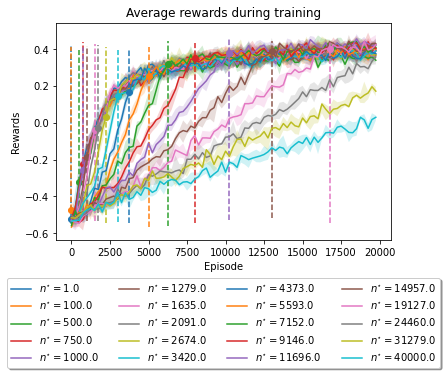

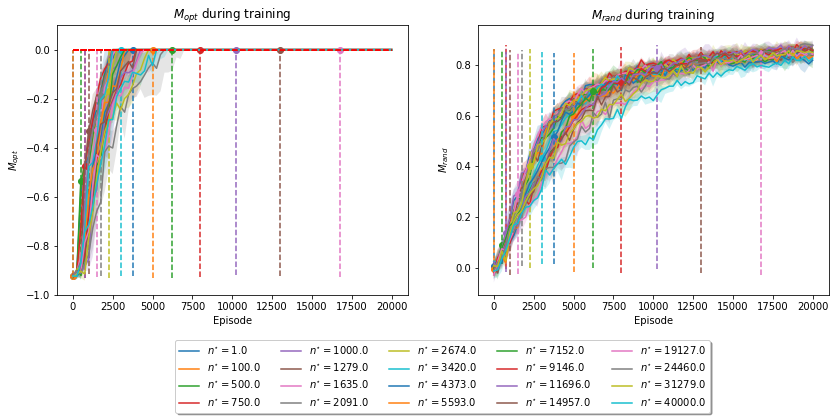

In [9]:
# Show plot of all the experimented values
plot_stats(stats_dict_nstar_list, vec_n_star, 'n_star', "n^{\star}", save=save_figs, decaying_exploration=True, perc=True)

#### Question 4: Good experts and bad experts

In [10]:
best_n_star = 9146 # best value according to previous experiments
M = 11
vec_eps_opt = np.round(np.linspace(0, 1, M), decimals=2)
var_name = 'epsilon_opt'
q_learning_params_list = []
for epsilon_opt in vec_eps_opt:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, best_n_star),
              'epsilon_opt': epsilon_opt,
              'against_opt': True}
    q_learning_params_list.append(params)

In [11]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Training, performs num_avg complete training runs
if train:
    stats_dict_eps_opt_list = train_avg(var_name, vec_eps_opt, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)
    
# Load results from dictionary
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/Q4.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_opt_list = pickle.load(handle)

epsilon_opt = 0.0 : 	M_opt =  0.0 	M_rand =  0.101
epsilon_opt = 0.2 : 	M_opt =  0.0 	M_rand =  0.612
epsilon_opt = 0.5 : 	M_opt =  0.0 	M_rand =  0.849
epsilon_opt = 0.8 : 	M_opt =  -0.253 	M_rand =  0.874
epsilon_opt = 1.0 : 	M_opt =  -0.348 	M_rand =  0.877


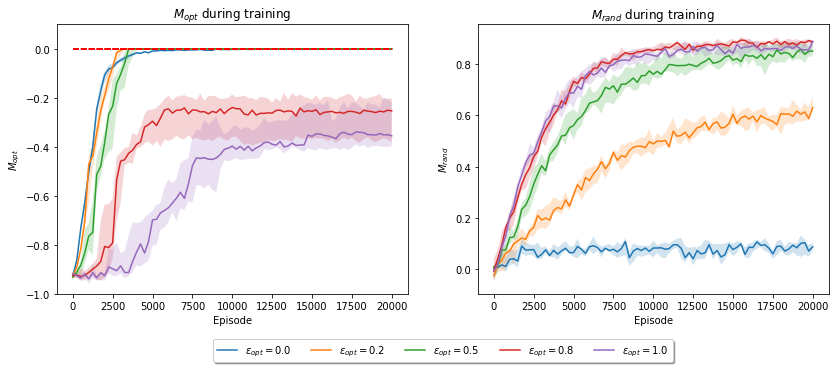

In [12]:
# Show plot presented in the report
plot_eps_opt = [0., 0.2, 0.5, 0.8, 1.]
plot_stats(stats_dict_eps_opt_list, plot_eps_opt, "epsilon_opt", "\epsilon_{opt}", save=save_figs, keys=['test_Mopt', 'test_Mrand'], perc=True)

epsilon_opt = 0.0 : 	M_opt =  0.0 	M_rand =  0.101
epsilon_opt = 0.1 : 	M_opt =  0.0 	M_rand =  0.442
epsilon_opt = 0.2 : 	M_opt =  0.0 	M_rand =  0.612
epsilon_opt = 0.3 : 	M_opt =  0.0 	M_rand =  0.762
epsilon_opt = 0.4 : 	M_opt =  0.0 	M_rand =  0.8
epsilon_opt = 0.5 : 	M_opt =  0.0 	M_rand =  0.849
epsilon_opt = 0.6 : 	M_opt =  0.0 	M_rand =  0.873
epsilon_opt = 0.7 : 	M_opt =  -0.043 	M_rand =  0.892
epsilon_opt = 0.8 : 	M_opt =  -0.253 	M_rand =  0.874
epsilon_opt = 0.9 : 	M_opt =  -0.276 	M_rand =  0.895
epsilon_opt = 1.0 : 	M_opt =  -0.348 	M_rand =  0.877


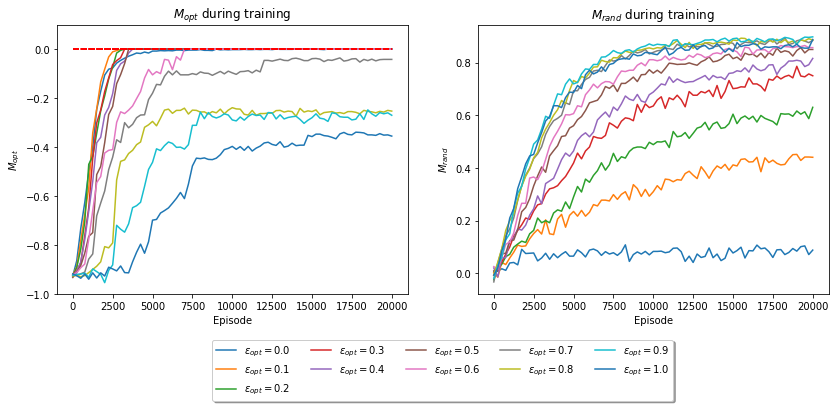

In [13]:
# Show plot of all the experimented values
plot_stats(stats_dict_eps_opt_list, vec_eps_opt, "epsilon_opt", "\epsilon_{opt}", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Question 5: Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [ ]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Setting hyperparams
n_star = 9146 # best n_star
epsilon_min = 0.1
epsilon_max = 0.8
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)

# Training and measuring performance, average over 10 complete runs
m_opt_vec = []
m_rand_vec = []
t_train_vec = []
for i in range(num_avg):
    Q, stats = q_learning(env, epsilon_exploration_rule = epsilon_exploration_rule, against_opt=True)
    # Measuring performance
    m_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
    m_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
    m_opt_vec.append(m_opt)
    m_rand_vec.append(m_rand)
    print("Finished run", i+1, "of", num_avg)
    
# Results
print('*********************', ' AVERAGE STATS ', '*********************')
print("Median: M_opt = ", np.round(np.median(m_opt_vec),decimals=3), " M_rand = ", np.round(np.median(m_rand_vec),decimals=3))
print("25th quantile: M_opt = ", np.round(np.percentile(m_opt_vec, q=25),decimals=3), 
      " M_rand = ", np.round(np.percentile(m_rand_vec, q=25),decimals=3))
print("75th quantile: M_opt = ", np.round(np.percentile(m_opt_vec, q=75),decimals=3),
      " M_rand = ", np.round(np.percentile(m_rand_vec, q=75),decimals=3))

### 2.2 Learning by self-practice

#### Question 7: performance measures $M_{\text{opt}}$ and $M_{\text{rand}}$ for different exploration rates $\epsilon$

In [14]:
eps_vec = np.round(np.linspace(0, 0.9, 10), decimals=1)
var_name = 'eps_self'
q_learning_params_list = []
for eps in eps_vec:
    params = {'env': env,
              'verbose': True,
              'num_episodes': num_episodes,
              'epsilon_exploration': eps,
              'test_freq': test_freq,
              'self_practice': True}
    q_learning_params_list.append(params)

In [15]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Training, performs num_avg complete training runs
if train:
    stats_dict_eps_self_list = train_avg(var_name, eps_vec, q_learning_params_list, num_avg=num_avg, save_stats=False)

# Load results from dictionary
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/Q7.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_self_list = pickle.load(handle)

epsilon_self = 0 : 	M_opt =  -0.843 	M_rand =  0.18
epsilon_self = 0.2 : 	M_opt =  -0.239 	M_rand =  0.77
epsilon_self = 0.5 : 	M_opt =  -0.113 	M_rand =  0.877
epsilon_self = 0.8 : 	M_opt =  -0.302 	M_rand =  0.898


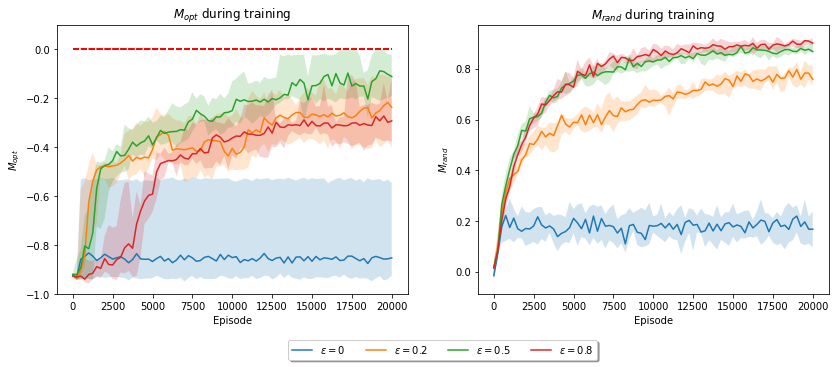

In [16]:
# Show plot presented in the report
eps_vec_plot = [0, 0.2, 0.5, 0.8]
plot_stats(stats_dict_eps_self_list, eps_vec_plot, "epsilon_self", "\epsilon", save=save_figs, perc=True, keys=['test_Mopt', 'test_Mrand'])

epsilon_self = 0.0 : 	M_opt =  -0.843 	M_rand =  0.18
epsilon_self = 0.1 : 	M_opt =  -0.352 	M_rand =  0.655
epsilon_self = 0.2 : 	M_opt =  -0.239 	M_rand =  0.77
epsilon_self = 0.3 : 	M_opt =  -0.158 	M_rand =  0.834
epsilon_self = 0.4 : 	M_opt =  -0.236 	M_rand =  0.862
epsilon_self = 0.5 : 	M_opt =  -0.113 	M_rand =  0.877
epsilon_self = 0.6 : 	M_opt =  -0.20800000000000002 	M_rand =  0.905
epsilon_self = 0.7 : 	M_opt =  -0.131 	M_rand =  0.892
epsilon_self = 0.8 : 	M_opt =  -0.302 	M_rand =  0.898
epsilon_self = 0.9 : 	M_opt =  -0.285 	M_rand =  0.918


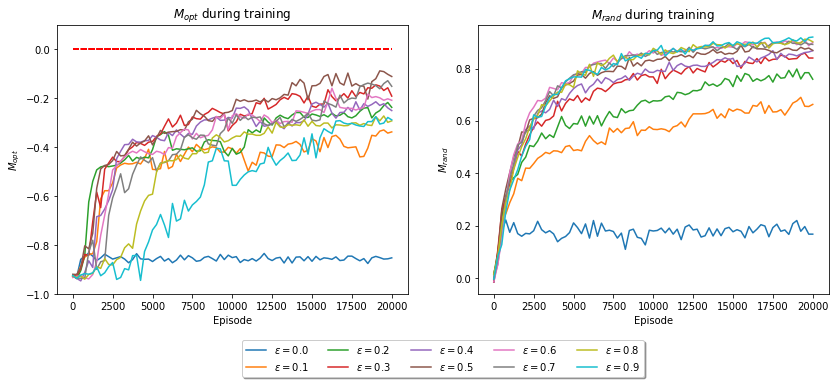

In [17]:
# Show plot of all the experimented values
plot_stats(stats_dict_eps_self_list, eps_vec, "epsilon_self", "\epsilon", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Question 8: Performance measures  $M_{\text{opt}}$ and $M_{\text{rand}}$ for different values of $n^{\star}$

In [18]:
epsilon_min = 0.1
epsilon_max = 0.8
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [19]:
q_learning_params_list = []
var_name = 'q_learning_n_star_self'
for n_star in vec_n_star:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'self_practice': True}
    q_learning_params_list.append(params)

In [20]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Training, performs num_avg complete training runs
if train:
    stats_dict_nstar = train_avg(var_name, vec_n_star, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

# Load results from dictionary 
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/Q8.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_list = pickle.load(handle)

n_star_self = 1.0 : 	M_opt =  -0.331 	M_rand =  0.6839999999999999
n_star_self = 9146.0 : 	M_opt =  -0.11 	M_rand =  0.838
n_star_self = 24460.0 : 	M_opt =  -0.07100000000000001 	M_rand =  0.871
n_star_self = 40000.0 : 	M_opt =  -0.118 	M_rand =  0.914


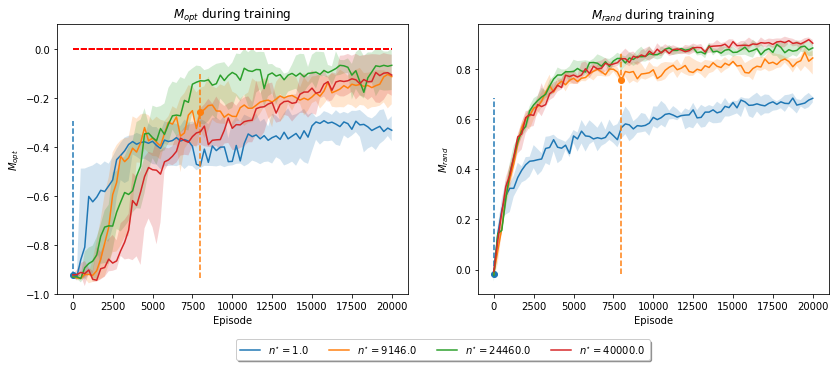

In [21]:
# Show plot presented in the report
plot_n_star = [1., 9146., 24460., 40000.]
plot_stats(stats_dict_nstar_list, plot_n_star, 'n_star_self', "n^{\star}", 
           decaying_exploration=True, save=save_figs, perc=True, keys=['test_Mopt', 'test_Mrand'])

n_star_self = 1.0 : 	M_opt =  -0.331 	M_rand =  0.6839999999999999
n_star_self = 100.0 : 	M_opt =  -0.313 	M_rand =  0.668
n_star_self = 500.0 : 	M_opt =  -0.28500000000000003 	M_rand =  0.649
n_star_self = 750.0 : 	M_opt =  -0.355 	M_rand =  0.644
n_star_self = 1000.0 : 	M_opt =  -0.257 	M_rand =  0.688
n_star_self = 1279.0 : 	M_opt =  -0.258 	M_rand =  0.705
n_star_self = 1635.0 : 	M_opt =  -0.275 	M_rand =  0.692
n_star_self = 2091.0 : 	M_opt =  -0.29 	M_rand =  0.685
n_star_self = 2674.0 : 	M_opt =  -0.29600000000000004 	M_rand =  0.702
n_star_self = 3420.0 : 	M_opt =  -0.32 	M_rand =  0.709
n_star_self = 4373.0 : 	M_opt =  -0.279 	M_rand =  0.74
n_star_self = 5593.0 : 	M_opt =  -0.239 	M_rand =  0.753
n_star_self = 7152.0 : 	M_opt =  -0.183 	M_rand =  0.806
n_star_self = 9146.0 : 	M_opt =  -0.11 	M_rand =  0.838
n_star_self = 11696.0 : 	M_opt =  -0.16599999999999998 	M_rand =  0.811
n_star_self = 14957.0 : 	M_opt =  -0.14 	M_rand =  0.843
n_star_self = 19127.0 : 	M_opt =  -0.201 	

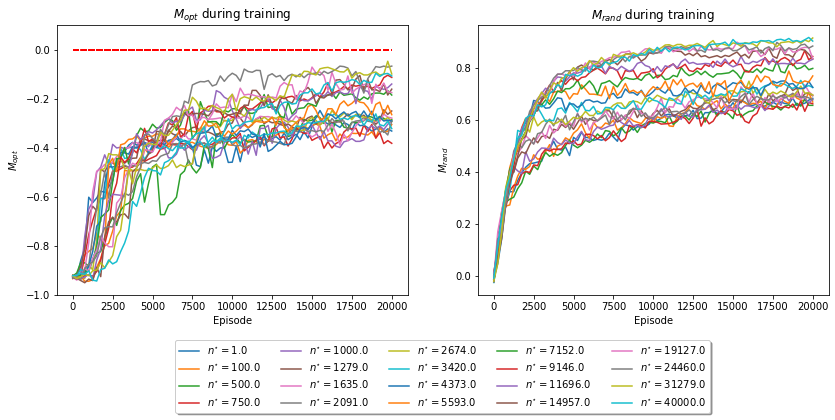

In [22]:
# Show plot of all the experimented values
plot_stats(stats_dict_nstar_list, vec_n_star, 'n_star_self', "n^{\star}", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Question 9: Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [ ]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Setting hyperparams
n_star = 24460
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)

# Training, average over 10 complete runs
m_opt_vec = []
m_rand_vec = []
for i in range(10):
    Q, stats = q_learning(env, epsilon_exploration_rule = epsilon_exploration_rule, self_practice=True)
    # Measuring performance
    m_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
    m_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
    m_opt_vec.append(m_opt)
    m_rand_vec.append(m_rand)
    print("Finished run", i+1, "of", num_avg)

# Results
print('*********************', ' AVERAGE STATS ', '*********************')
print("Median:\tM_opt = ", np.round(np.median(m_opt_vec),decimals=3), "\t M_rand = ", np.round(np.median(m_rand_vec),decimals=3))
print("25th quantile:\tM_opt = ", np.round(np.percentile(m_opt_vec, q=25),decimals=3), "\t M_rand = ", np.round(np.percentile(m_rand_vec, q=25),decimals=3))
print("75th quantile:\tM_opt = ", np.round(np.percentile(m_opt_vec, q=75),decimals=3), "\t M_rand = ", np.round(np.percentile(m_rand_vec, q=75),decimals=3))

#### Question 10: Heatmaps of the Q-values in 3 significant states

In [ ]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Optimal params
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 24460
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)

# Training
Q, stats = q_learning(env, epsilon_exploration_rule=epsilon_exploration_rule, self_practice=True)

In [ ]:
# States of interest
win_chance = [1., 0., 0., -1., 1., 0., 0., -1., 0.]
block_win = [1., 0., 1., 0., -1., 0., 0., 0., 0.]
fork_chance = [1., -1., 1., -1., 0., 0., 0., 0., 0.]
grids = [win_chance, block_win, fork_chance]


grid_numpy = []
for i in range(len(grids)):
    grid_numpy.append(np.array(grids[i]).reshape(3,3))
    
# Plot heatmaps
heatmaps_subplots(grid_numpy, Q, save=save_figs)

## 3. Deep Q-Learning

In [ ]:
# Configuration paramaters for the whole setup
env = TictactoeEnv()

lr = 1e-4 # learning rate obtained by grid search
num_episodes = 20000
test_freq = 250
num_avg = 4
epsilon_min = 0.1
epsilon_max = 0.8

# Folder for results
output_folder = os.path.join(os.getcwd(), 'results')
os.makedirs(output_folder, exist_ok=True)

### 3.1 Learning from experts

#### Question 11: Average reward and average loss during training for $\epsilon = 0.1$

epsilon_exploration_Q11 = 0.1 : 	M_opt =  0.0 	M_rand =  0.954


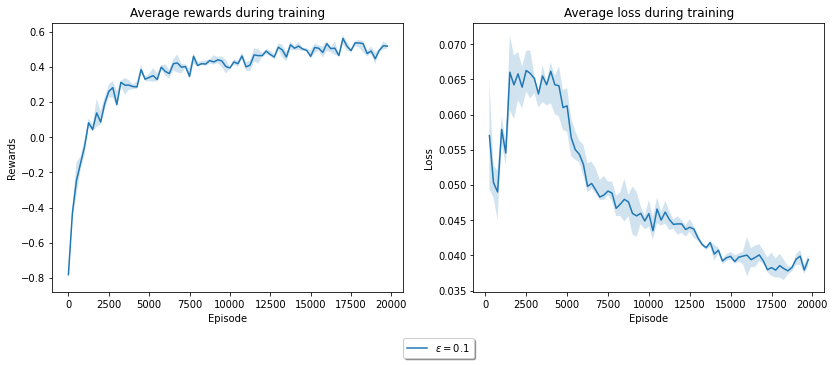

In [23]:
# Seed
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Training, performs num_avg complete training runs without performance test
epsilon_exploration = 0.1
stats_dict_list = []
if train:
    for i in range(num_avg):
        print('************** RUN', i+1, 'OF', num_avg, '**************')
        stats_dict = {}
        start = time.time()
        model, stats = deep_q_learning(env, lr = lr, epsilon_exploration=epsilon_exploration, num_episodes=num_episodes, against_opt=True, verbose=True)
        print('Only training time: ', time.time() - start)
        M_opt = measure_performance(DeepQPlayer(model=model), OptimalPlayer(epsilon=0.))
        M_rand = measure_performance(DeepQPlayer(model=model), OptimalPlayer(epsilon=1.))
        print("M_opt =", M_opt)
        print("M_rand =", M_rand)
        stats_dict.update({epsilon_exploration: (stats, M_opt, M_rand)})
        stats_dict_list.append(stats_dict)
        print('RUN', i+1, 'took', np.round(time.time()-start,decimals=1), 'seconds')
    if save_stats:
        fname = output_folder + '/dqn_stats_dict_q11.pkl'
        with open(fname, 'wb') as handle:
            pickle.dump(stats_dict_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load results from dictionary
if load:
    fname = output_folder + '/Q11.pkl'
    with open(fname, 'rb') as handle:
            stats_dict_list = pickle.load(handle)

# Plot of the average reward and average training loss over num_avg training runs with 25th and 75th percentiles'   
plot_stats(stats_dict_list, [epsilon_exploration], 'epsilon_exploration_Q11', '\epsilon', save=save_figs, keys = ['rewards', 'loss'], perc=True)

#### Question 12: Same as Question 11, but no replay buffer and batch_size = 1

epsilon_exploration_Q12 = 0.1 : 	M_opt =  -0.08399999999999999 	M_rand =  0.861


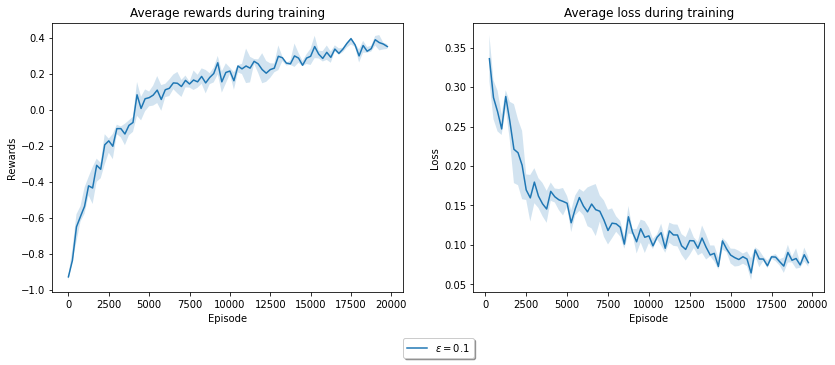

In [24]:
# Seed
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Training, performs num_avg complete training runs without performance test
epsilon_exploration = 0.1
stats_dict_list = []
if train:
    for i in range(num_avg):
        print('************** RUN', i+1, 'OF', num_avg, '**************')
        stats_dict = {}
        start = time.time()
        model, stats = deep_q_learning(env, epsilon_exploration=epsilon_exploration, num_episodes=num_episodes, against_opt=True, batch_size=1, max_memory_length=1)
        M_opt = measure_performance(DeepQPlayer(model=model), OptimalPlayer(epsilon=0.))
        M_rand = measure_performance(DeepQPlayer(model=model), OptimalPlayer(epsilon=1.))
        print("M_opt =", M_opt)
        print("M_rand =", M_rand)
        stats_dict.update({epsilon_exploration: (stats, M_opt, M_rand)})
        stats_dict_list.append(stats_dict)
        print('RUN', i+1, 'took', np.round(time.time()-start,decimals=1), 'seconds')
    if save_stats:
        fname = output_folder + '/Q12.pkl'
        with open(fname, 'wb') as handle:
            pickle.dump(stats_dict_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load results from dictionary
if load:
    fname = output_folder + '/Q12.pkl'
    with open(fname, 'rb') as handle:
            stats_dict_list = pickle.load(handle)

# Plot of the average reward and average training loss over num_avg training runs with 25th and 75th percentiles'              
plot_stats(stats_dict_list, [epsilon_exploration], 'epsilon_exploration_Q12', '\epsilon', save=save_figs, keys = ['rewards', 'loss'], perc=True)

#### Question 13: Performance measures $M_{\text{opt}}$ and $M_{\text{rand}}$ for different values of $n^{*}$

In [25]:
vec_n_star = np.hstack((np.array([1, 100, 1000]), np.round(np.logspace(np.log10(5000), np.log10(40000), 7))))
var_name = 'deep_q_learning_n_star_experts'
dqn_params_list = []
for n_star in vec_n_star:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'against_opt': True}
    dqn_params_list.append(params)

In [26]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Training, performs num_avg complete training runs
if train:
    stats_dict_nstar = deep_train_avg(var_name, vec_n_star, dqn_params_list, num_avg=num_avg, save_stats=save_stats)

# Load results from dictionary
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/Q13.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_list = pickle.load(handle)

dqn_n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.9339999999999999
dqn_n_star = 10000.0 : 	M_opt =  0.0 	M_rand =  0.952
dqn_n_star = 20000.0 : 	M_opt =  0.0 	M_rand =  0.9339999999999999
dqn_n_star = 40000.0 : 	M_opt =  0.0 	M_rand =  0.945


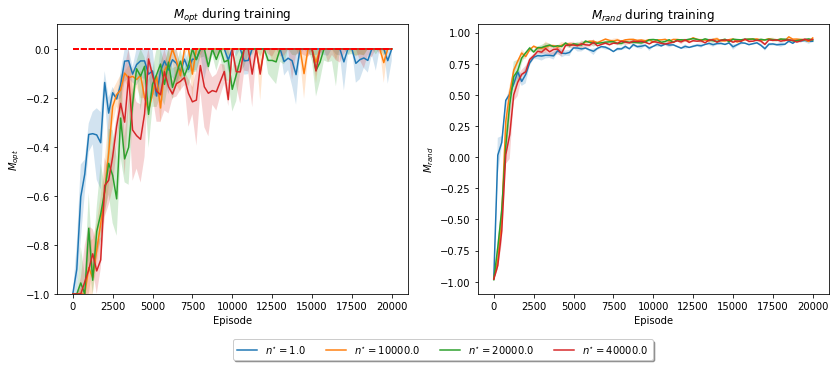

In [27]:
# Show plot presented in the report
plot_n_star = [1., 10000., 20000., 40000.]
plot_stats(stats_dict_nstar_list, plot_n_star, 'dqn_n_star', "n^{\star}", save=save_figs, perc=True, keys=['test_Mopt', 'test_Mrand'])

dqn_n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.9339999999999999
dqn_n_star = 100.0 : 	M_opt =  0.0 	M_rand =  0.929
dqn_n_star = 1000.0 : 	M_opt =  0.0 	M_rand =  0.942
dqn_n_star = 5000.0 : 	M_opt =  0.0 	M_rand =  0.9410000000000001
dqn_n_star = 7071.0 : 	M_opt =  0.0 	M_rand =  0.938
dqn_n_star = 10000.0 : 	M_opt =  0.0 	M_rand =  0.952
dqn_n_star = 14142.0 : 	M_opt =  -0.096 	M_rand =  0.948
dqn_n_star = 20000.0 : 	M_opt =  0.0 	M_rand =  0.9339999999999999
dqn_n_star = 28284.0 : 	M_opt =  0.0 	M_rand =  0.955
dqn_n_star = 40000.0 : 	M_opt =  0.0 	M_rand =  0.945


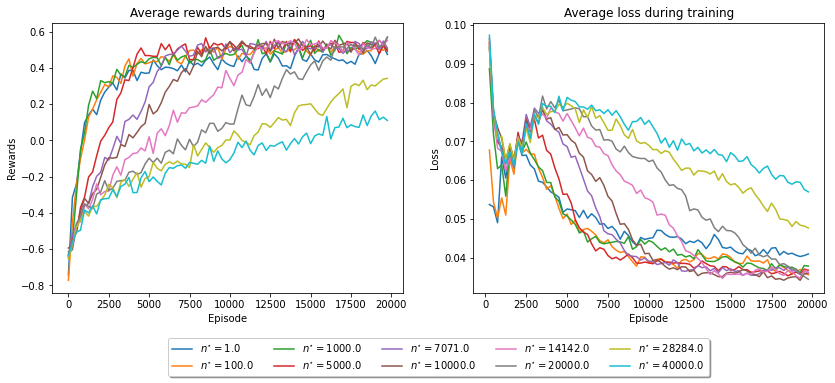

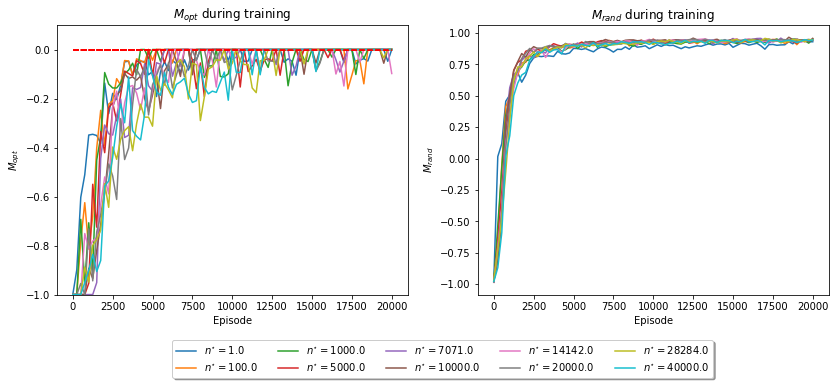

In [28]:
# Show plot of all the experimented values
plot_stats(stats_dict_nstar_list, vec_n_star, 'dqn_n_star', "n^{\star}", save=False, decaying_exploration=False)

#### Question 14: Performance measures  $M_{\text{opt}}$ and $M_{\text{rand}}$ for different values of $\epsilon_{\text{opt}}$

In [29]:
best_n_star = 20000 # best n_star according to the previous experiments
M = 11
vec_eps_opt = np.round(np.linspace(0, 1, M), decimals=2)
deep_q_learning_params_list = []
var_name = 'deep_q_learning_epsilon_opt_experts'
for eps in vec_eps_opt:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, best_n_star),
              'epsilon_opt': eps,
              'test_freq': test_freq,
              'against_opt': True}
    deep_q_learning_params_list.append(params)

In [30]:
# Seed
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Training, performs num_avg complete training runs
if train:
    stats_dict_epsilon_opt_list_deep = deep_train_avg(var_name, vec_eps_opt, deep_q_learning_params_list, 
                                                      num_avg=num_avg, save_stats=save_stats)

# Load results from dictionary
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/Q14.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_opt_list = pickle.load(handle)

dqn_epsilon_opt_experts = 0.0 : 	M_opt =  0.0 	M_rand =  -0.326
dqn_epsilon_opt_experts = 0.2 : 	M_opt =  0.0 	M_rand =  0.92
dqn_epsilon_opt_experts = 0.5 : 	M_opt =  0.0 	M_rand =  0.9390000000000001
dqn_epsilon_opt_experts = 0.7 : 	M_opt =  -0.098 	M_rand =  0.951
dqn_epsilon_opt_experts = 1.0 : 	M_opt =  -0.227 	M_rand =  0.915


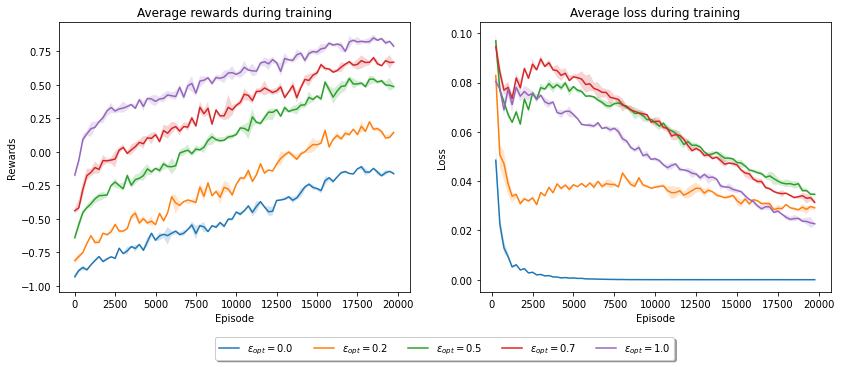

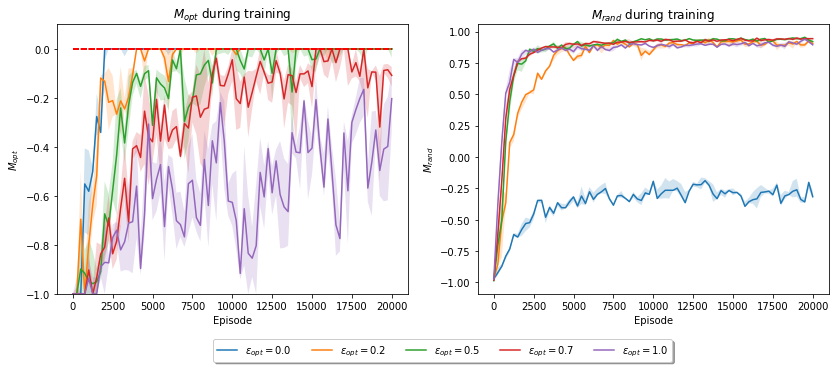

In [31]:
# Show plot presented in the report
plot_epsilon_opt = [0.0, 0.2, 0.5, 0.7, 1.0]
plot_stats(stats_dict_eps_opt_list, plot_epsilon_opt, 'dqn_epsilon_opt_experts', "\epsilon_{opt}", save=save_figs, perc=True)

dqn_epsilon_opt_experts = 0.0 : 	M_opt =  0.0 	M_rand =  -0.326
dqn_epsilon_opt_experts = 0.1 : 	M_opt =  0.0 	M_rand =  0.91
dqn_epsilon_opt_experts = 0.2 : 	M_opt =  0.0 	M_rand =  0.92
dqn_epsilon_opt_experts = 0.3 : 	M_opt =  0.0 	M_rand =  0.9299999999999999
dqn_epsilon_opt_experts = 0.4 : 	M_opt =  0.0 	M_rand =  0.951
dqn_epsilon_opt_experts = 0.5 : 	M_opt =  0.0 	M_rand =  0.9390000000000001
dqn_epsilon_opt_experts = 0.6 : 	M_opt =  0.0 	M_rand =  0.938
dqn_epsilon_opt_experts = 0.7 : 	M_opt =  -0.098 	M_rand =  0.951
dqn_epsilon_opt_experts = 0.8 : 	M_opt =  -0.17300000000000001 	M_rand =  0.937
dqn_epsilon_opt_experts = 0.9 : 	M_opt =  -0.10300000000000001 	M_rand =  0.927
dqn_epsilon_opt_experts = 1.0 : 	M_opt =  -0.227 	M_rand =  0.915


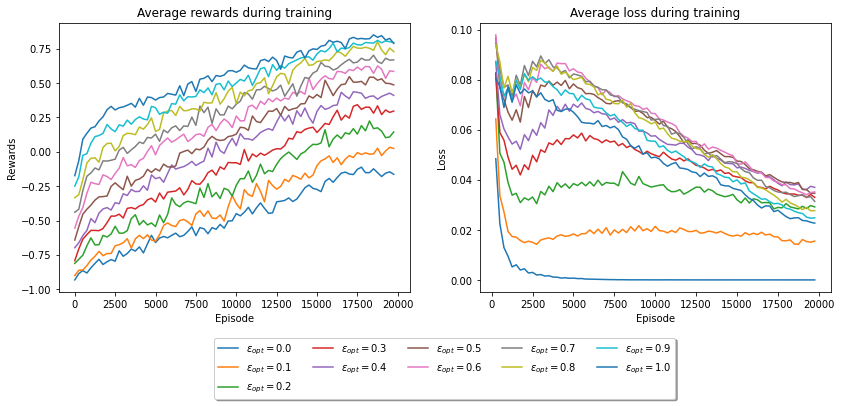

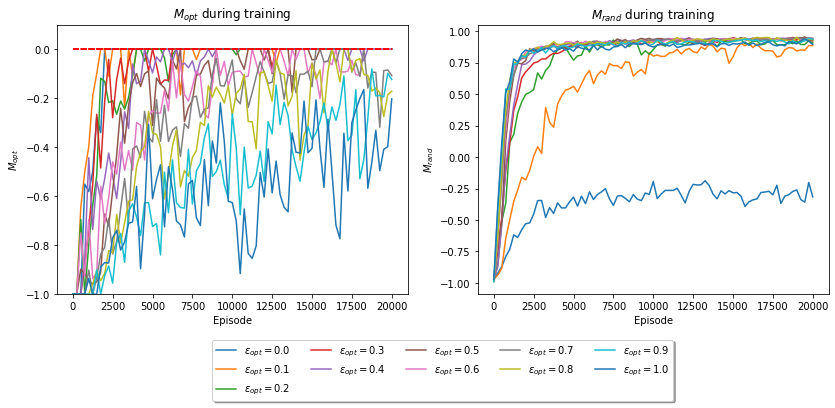

In [32]:
# Show plot of all the experimented values
plot_stats(stats_dict_eps_opt_list, vec_eps_opt, 'dqn_epsilon_opt_experts', "\epsilon_{opt}", save=False)

#### Question 15: Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [ ]:
# Seed
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Optimal params
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 20000
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)

# Training, single run
model, stats = deep_q_learning(env, epsilon_exploration_rule=epsilon_exploration_rule, against_opt=True)

# Print results
M_opt = measure_performance(DeepQPlayer(model=model), OptimalPlayer(epsilon=0.))
print("M_opt = ", M_opt)
M_rand = measure_performance(DeepQPlayer(model=model), OptimalPlayer(epsilon=1.))
print("M_rand = ", M_rand)

## 3.2 Learning by self-practice

#### Question 16: Performance measures $M_{\text{opt}}$ and $M_{\text{rand}}$ for different exploration rates $\epsilon$

In [33]:
M = 10
vec_eps = np.linspace(0, 0.9, M)
var_name = 'deep_q_learning_epsilon_self'
dqn_params_list = []
for eps in vec_eps:
    params = {'env': env,
          'num_episodes': num_episodes,
          'epsilon_exploration': eps,
          'verbose': True,
          'test_freq': test_freq,
          'self_practice': True}
    dqn_params_list.append(params)

In [34]:
# Seed
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Training, performs num_avg complete training runs
if train:
    stats_dict_epsilon_self_list_deep = deep_train_avg(var_name, vec_eps, dqn_params_list, num_avg=num_avg, save_stats=save_stats)

# Load results from dictionary
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/Q16.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_epsilon_self_list_deep = pickle.load(handle)

epsilon_dqn_self = 0 : 	M_opt =  -1.0 	M_rand =  0.14
epsilon_dqn_self = 0.2 : 	M_opt =  0.0 	M_rand =  0.935
epsilon_dqn_self = 0.5 : 	M_opt =  0.0 	M_rand =  0.93
epsilon_dqn_self = 0.8 : 	M_opt =  -0.45099999999999996 	M_rand =  0.922


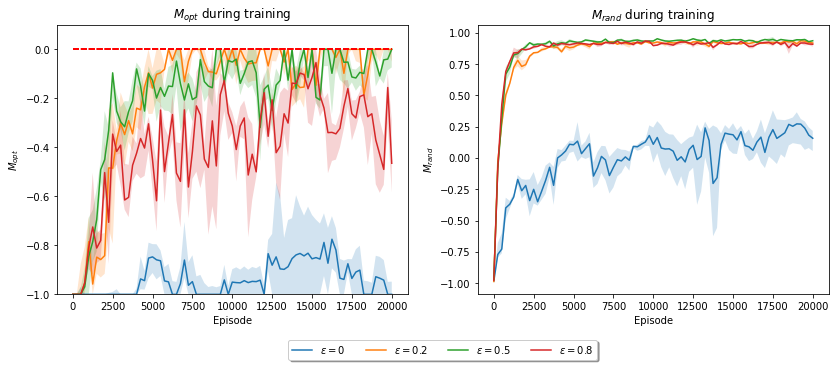

In [35]:
# Show plot presented in the report
plot_eps = [0, 0.2, 0.5, 0.8]
plot_stats(stats_dict_epsilon_self_list_deep, plot_eps, 'epsilon_dqn_self', "\epsilon",
           save=save_figs, perc=True, keys=['test_Mopt', 'test_Mrand'])

epsilon = 0.0 : 	M_opt =  -1.0 	M_rand =  0.14
epsilon = 0.1 : 	M_opt =  -0.14900000000000002 	M_rand =  0.914
epsilon = 0.2 : 	M_opt =  0.0 	M_rand =  0.935
epsilon = 0.30000000000000004 : 	M_opt =  0.0 	M_rand =  0.936
epsilon = 0.4 : 	M_opt =  -0.053 	M_rand =  0.9390000000000001
epsilon = 0.5 : 	M_opt =  0.0 	M_rand =  0.93
epsilon = 0.6000000000000001 : 	M_opt =  -0.049 	M_rand =  0.921
epsilon = 0.7000000000000001 : 	M_opt =  -0.053 	M_rand =  0.928
epsilon = 0.8 : 	M_opt =  -0.45099999999999996 	M_rand =  0.922
epsilon = 0.9 : 	M_opt =  -0.567 	M_rand =  0.865


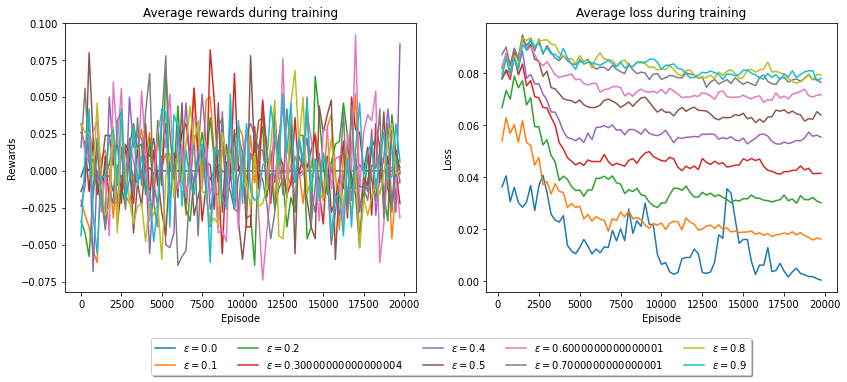

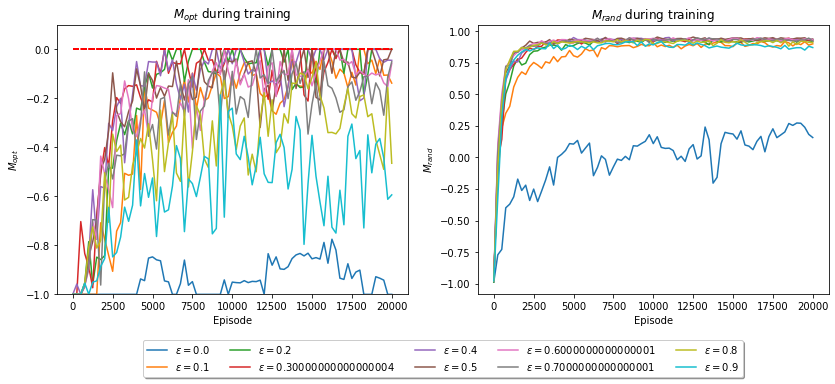

In [36]:
# Show plot of all the experimented values
plot_stats(stats_dict_epsilon_self_list_deep, vec_eps, 'epsilon', "\epsilon", save=False)

#### Question 17: Performance measures $M_{\text{opt}}$ and $M_{\text{rand}}$ for different values of $n^{\star}$

In [37]:
vec_n_star = np.hstack((np.array([1, 100, 1000]), np.round(np.logspace(np.log10(5000), np.log10(40000), 7))))
var_name = 'deep_q_learning_n_star_self'
dqn_params_list = []
for n_star in vec_n_star:
    params = {'env': env,
          'num_episodes': num_episodes,
          'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
          'verbose': True,
          'test_freq': test_freq,
          'self_practice': True}
    dqn_params_list.append(params)

In [38]:
# Seed
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Training, performs num_avg complete training runs
if train:
    stats_dict_nstar_self_list_deep = deep_train_avg(var_name, vec_n_star, dqn_params_list, 
                                                     num_avg=num_avg, save_stats=save_stats)

# Load results from dictionary
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/Q17.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_self_list_deep = pickle.load(handle)

n_star_dqn_self = 1.0 : 	M_opt =  0.0 	M_rand =  0.908
n_star_dqn_self = 10000.0 : 	M_opt =  0.0 	M_rand =  0.907
n_star_dqn_self = 20000.0 : 	M_opt =  0.0 	M_rand =  0.92
n_star_dqn_self = 40000.0 : 	M_opt =  0.0 	M_rand =  0.9430000000000001


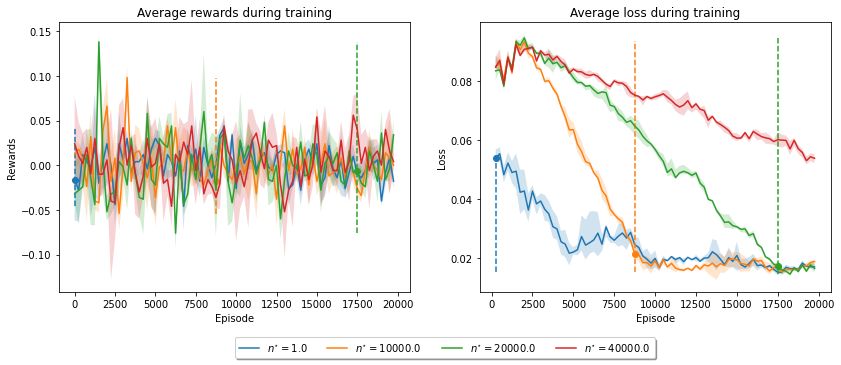

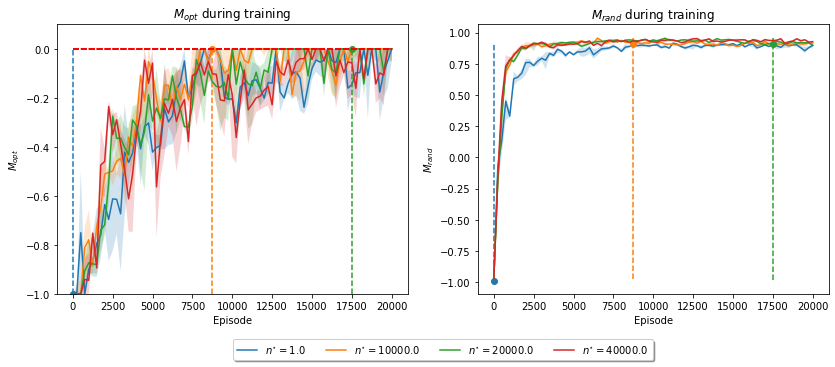

In [39]:
# Show plot presented in the report
plot_n_star = [1., 10000., 20000., 40000.]
plot_stats(stats_dict_nstar_self_list_deep, plot_n_star, 'n_star_dqn_self', "n^{\star}", save=save_figs, decaying_exploration=True, perc=True)

n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.908
n_star = 100.0 : 	M_opt =  -0.093 	M_rand =  0.867
n_star = 1000.0 : 	M_opt =  0.0 	M_rand =  0.897
n_star = 5000.0 : 	M_opt =  0.0 	M_rand =  0.912
n_star = 7071.0 : 	M_opt =  0.0 	M_rand =  0.915
n_star = 10000.0 : 	M_opt =  0.0 	M_rand =  0.907
n_star = 14142.0 : 	M_opt =  -0.111 	M_rand =  0.914
n_star = 20000.0 : 	M_opt =  0.0 	M_rand =  0.92
n_star = 28284.0 : 	M_opt =  -0.087 	M_rand =  0.928
n_star = 40000.0 : 	M_opt =  0.0 	M_rand =  0.9430000000000001


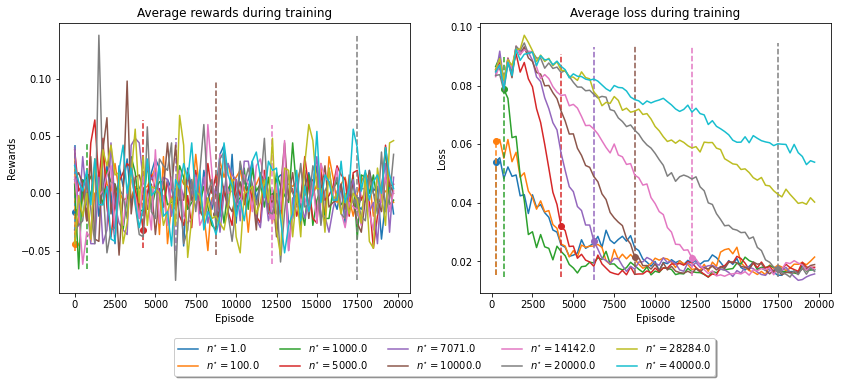

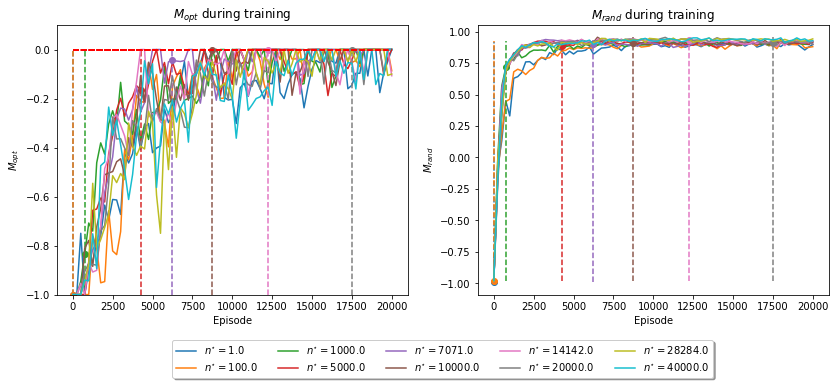

In [40]:
# Show plot of all the experimented values
plot_stats(stats_dict_nstar_self_list_deep, vec_n_star, 'n_star', "n^{\star}", save=False, decaying_exploration=True)

#### Question 18: Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [ ]:
# Seed
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Parameters
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 10000
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)

# Training, single run
model, stats = deep_q_learning(env, epsilon_exploration_rule=epsilon_exploration_rule, self_practice=True)

# Print results
M_opt = measure_performance(DeepQPlayer(model=model), OptimalPlayer(epsilon=0.))
print("M_opt =", M_opt)
M_rand = measure_performance(DeepQPlayer(model=model), OptimalPlayer(epsilon=1.))
print("M_rand =", M_rand)

#### Question 19: Heatmaps of the Q-values in 3 significant states

In [ ]:
# Seed
np.random.seed(seed)
random.seed(seed)

# Optimal params
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 10000
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)

# Training
model, stats = deep_q_learning(env, alpha=0.05, epsilon_exploration_rule=epsilon_exploration_rule, self_practice=True)

In [ ]:
# States of interest
win_chance = [1., 0., 0., -1., 1., 0., 0., -1., 0.]
block_win = [1., 0., 1., 0., -1., 0., 0., 0., 0.]
fork_chance = [1., -1., 1., -1., 0., 0., 0., 0., 0.]
grids = [win_chance, block_win, fork_chance]


grid_numpy = []
for i in range(len(grids)):
    grid_numpy.append(np.array(grids[i]).reshape(3,3))
    
# Plot heatmaps
heatmaps_deep_subplots(grid_numpy, model, save=save_figs)

## 4. Comparison between Q-Learning and Deep Q-Learning

#### Question 20: Training times for both learning methods

In [55]:
# Load results of best parameters from dictionary
output_folder = os.path.join(os.getcwd(), 'results')
os.makedirs(output_folder, exist_ok=True)
fname = output_folder + '/Q4.pkl'
with open(fname, 'rb') as handle:
    stats_dict = pickle.load(handle)

# Best_n_star
stats_dict_best_n_star = [stats_dict[i][0.5] for i in range(10)]
final_m_opt = [stats_dict_best_n_star[i][1] for i in range(10)]
test_m_opt = [stats_dict_best_n_star[i][0]['test_Mopt'] for i in range(10)]
final_m_rand = [stats_dict_best_n_star[i][2] for i in range(10)]
test_m_rand = [stats_dict_best_n_star[i][0]['test_Mrand'] for i in range(10)]

# Compute training time
starting_m_opt = [test_m_opt[i][0] for i in range(10)]
train_times_m_opt = np.array([np.where(np.array(test_m_opt[i]) > starting_m_opt[i] 
                                       + 0.8 * (final_m_opt[i]-starting_m_opt[i]))[0][0] for i in range(10)])
train_times_m_opt = train_times_m_opt * test_freq
train_times_m_opt
starting_m_rand = [test_m_rand[i][0] for i in range(10)]
train_times_m_rand = np.array([np.where(np.array(test_m_rand[i]) > starting_m_rand[i] 
                                       + 0.8 * (final_m_rand[i]-starting_m_rand[i]))[0][0] for i in range(10)])
train_times_m_rand = train_times_m_rand * test_freq
train_times = [np.maximum(train_times_m_opt[i], train_times_m_rand[i]) for i in range(10)]

# Results
print('*********************', ' AVERAGE STATS ', '*********************')
print("Median:\t T_train = ", np.round(np.median(train_times),decimals=3))
print("25th quantile:\t T_train = ", np.round(np.percentile(train_times, q=25),decimals=3) )
print("75th quantile:\t T_train = ", np.round(np.percentile(train_times, q=75),decimals=3))

*********************  AVERAGE STATS  *********************
Median:	 T_train =  6625.0
25th quantile:	 T_train =  5812.5
75th quantile:	 T_train =  7375.0


In [42]:
# Load results of best parameters from dictionary
output_folder = os.path.join(os.getcwd(), 'results')
os.makedirs(output_folder, exist_ok=True)
fname = output_folder + '/Q8.pkl'
with open(fname, 'rb') as handle:
    stats_dict = pickle.load(handle)

# Best_n_star
stats_dict_best_n_star = [stats_dict[i][24460.0] for i in range(10)]
final_m_opt = [stats_dict_best_n_star[i][1] for i in range(10)]
test_m_opt = [stats_dict_best_n_star[i][0]['test_Mopt'] for i in range(10)]
final_m_rand = [stats_dict_best_n_star[i][2] for i in range(10)]
test_m_rand = [stats_dict_best_n_star[i][0]['test_Mrand'] for i in range(10)]

# Compute training time
starting_m_opt = [test_m_opt[i][0] for i in range(10)]
train_times_m_opt = np.array([np.where(np.array(test_m_opt[i]) > starting_m_opt[i] 
                                       + 0.8 * (final_m_opt[i]-starting_m_opt[i]))[0][0] for i in range(10)])
train_times_m_opt = train_times_m_opt * test_freq
train_times_m_opt
starting_m_rand = [test_m_rand[i][0] for i in range(10)]
train_times_m_rand = np.array([np.where(np.array(test_m_rand[i]) > starting_m_rand[i] 
                                       + 0.8 * (final_m_rand[i]-starting_m_rand[i]))[0][0] for i in range(10)])
train_times_m_rand = train_times_m_rand * test_freq
train_times = [np.maximum(train_times_m_opt[i], train_times_m_rand[i]) for i in range(10)]

# Results
print('*********************', ' AVERAGE STATS ', '*********************')
print("Median:\t T_train = ", np.round(np.median(train_times),decimals=3))
print("25th quantile:\t T_train = ", np.round(np.percentile(train_times, q=25),decimals=3))
print("75th quantile:\t T_train = ", np.round(np.percentile(train_times, q=75),decimals=3))

*********************  AVERAGE STATS  *********************
Median:	 T_train =  6625.0
25th quantile:	 T_train =  5062.5
75th quantile:	 T_train =  8812.5


In [43]:
# Load results of best parameters from dictionary
output_folder = os.path.join(os.getcwd(), 'results')
os.makedirs(output_folder, exist_ok=True)
fname = output_folder + '/Q14.pkl'
with open(fname, 'rb') as handle:
    stats_dict = pickle.load(handle)
    
# Best_n_star
stats_dict_best_n_star = [stats_dict[i][0.5] for i in range(4)]
final_m_opt = [stats_dict_best_n_star[i][1] for i in range(4)]
test_m_opt = [stats_dict_best_n_star[i][0]['test_Mopt'] for i in range(4)]
final_m_rand = [stats_dict_best_n_star[i][2] for i in range(4)]
test_m_rand = [stats_dict_best_n_star[i][0]['test_Mrand'] for i in range(4)]

# Compute training time
starting_m_opt = [test_m_opt[i][0] for i in range(4)]
train_times_m_opt = np.array([np.where(np.array(test_m_opt[i]) > starting_m_opt[i] 
                                       + 0.8 * (final_m_opt[i]-starting_m_opt[i]))[0][0] for i in range(4)])
train_times_m_opt = train_times_m_opt * test_freq
train_times_m_opt
starting_m_rand = [test_m_rand[i][0] for i in range(4)]
train_times_m_rand = np.array([np.where(np.array(test_m_rand[i]) > starting_m_rand[i] 
                                       + 0.8 * (final_m_rand[i]-starting_m_rand[i]))[0][0] for i in range(4)])
train_times_m_rand = train_times_m_rand * test_freq
train_times = [np.maximum(train_times_m_opt[i], train_times_m_rand[i]) for i in range(4)]

# Results
print('*********************', ' AVERAGE STATS ', '*********************')
print("Median:\t T_train = ", np.round(np.median(train_times),decimals=3))
print("25th quantile:\t T_train = ", np.round(np.percentile(train_times, q=25),decimals=3))
print("75th quantile:\t T_train = ", np.round(np.percentile(train_times, q=75),decimals=3))

*********************  AVERAGE STATS  *********************
Median:	 T_train =  3500.0
25th quantile:	 T_train =  3250.0
75th quantile:	 T_train =  3562.5


In [44]:
# Load results of best parameters from dictionary
output_folder = os.path.join(os.getcwd(), 'results')
os.makedirs(output_folder, exist_ok=True)
fname = output_folder + '/Q17.pkl'
with open(fname, 'rb') as handle:
    stats_dict = pickle.load(handle)
    
# Best_n_star
stats_dict_best_n_star = [stats_dict[i][10000.0] for i in range(4)]
final_m_opt = [stats_dict_best_n_star[i][1] for i in range(4)]
test_m_opt = [stats_dict_best_n_star[i][0]['test_Mopt'] for i in range(4)]
final_m_rand = [stats_dict_best_n_star[i][2] for i in range(4)]
test_m_rand = [stats_dict_best_n_star[i][0]['test_Mrand'] for i in range(4)]

# Compute training time
starting_m_opt = [test_m_opt[i][0] for i in range(4)]
train_times_m_opt = np.array([np.where(np.array(test_m_opt[i]) > starting_m_opt[i] 
                                       + 0.8 * (final_m_opt[i]-starting_m_opt[i]))[0][0] for i in range(4)])
train_times_m_opt = train_times_m_opt * test_freq
train_times_m_opt
starting_m_rand = [test_m_rand[i][0] for i in range(4)]
train_times_m_rand = np.array([np.where(np.array(test_m_rand[i]) > starting_m_rand[i] 
                                       + 0.8 * (final_m_rand[i]-starting_m_rand[i]))[0][0] for i in range(4)])
train_times_m_rand = train_times_m_rand * test_freq
train_times = [np.maximum(train_times_m_opt[i], train_times_m_rand[i]) for i in range(4)]

# Results
print('*********************', ' AVERAGE STATS ', '*********************')
print("Median:\t T_train = ", np.round(np.median(train_times),decimals=3))
print("25th quantile:\t T_train = ", np.round(np.percentile(train_times, q=25),decimals=3))
print("75th quantile:\t T_train = ", np.round(np.percentile(train_times, q=75),decimals=3))

*********************  AVERAGE STATS  *********************
Median:	 T_train =  4000.0
25th quantile:	 T_train =  3750.0
75th quantile:	 T_train =  4062.5
